In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

The Diabetes dataset says where a person has diabetes or not based on various parameters. The dataset contains 9 varaibles out of which 8 are Independent variable and 1 dependent variable.

**Independent Variables**
1. Pregnancies: no of times pregnant.
2. Glucose: Plasma glucose conc. a 2 hrs in an oral glucose tolerance test.
3. BP: Diastolic Blood pressure.
4. Skin Thickness: Triceps skin fold thickness.
5. Insulin: 2-hr serum insulin.
6. BMI: Body mass Index.
7. DiabetesPF: Diabetes pedigree fun.
8. Age: Age in yrs

Dependent Variable
1. Outcome: 0 or 1

In [5]:
df.info() # Data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Dataset types

In [6]:
df.dtypes   # Data types

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

The data types is correct for all the variables.

# Description of the dataset

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the description, we can see that the count of all the variables are 768 and hence we can say that there are no missing data present.

In [8]:
# To check for missing values in dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From this, we can say that there are no null values present.

# Analysing Missing data or data with '0' values

In [9]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Missing Data:

1. The result shows that there are no null values / Missing data in the datset.
2. As per the dataset, we can say that '0' values does not make sense for few columns presented below:

  a. Diastolic BP

  b. Body Mass Index

  c. Plasma glucose concentration

  d. Triceps skinfold thickness

  e. 2-hr serum insulin

3. This means that these columns having a value of zero indicates an invalid or missing value which needs to be handled.

Steps for handling missing values

1. First, replace the 0 values by NaN for the respective columns so that the no of missing values can be counted.
2. Replace the NaN value by median. 
3. Although in this dataset, both mean and median have similar range of values except for Insulin variable, I choose median for better measure.

In [10]:
# Replace 0 values by NaN
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [11]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [12]:
# Find the no of missing values in the dataset
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
# Finding % of missing values for skin Thickness and Insulin
st_percent = (df['SkinThickness'].isnull().sum() / len(df))*100
Insulin_percent = (df['Insulin'].isnull().sum() / len(df))*100
print(st_percent, Insulin_percent)

29.557291666666668 48.69791666666667


From above analysis, we can observe that Skin Thickness and Insulin has a percentage of about 30% and 49% of missing values. These variables can be neglected but these also produces a major contribution to the dataset and hence the missing values are Imputed.

In [14]:
# Replacing NaN to median value to explore dataset

columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns:
  df[col].fillna(df[col].median(), inplace = True)

In [15]:
df.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


# Visualization

# How much percentage of people are diabetic and healthy?

In [16]:
# Outcome analyis
# To get the number of Diabetic and healthy persons

df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

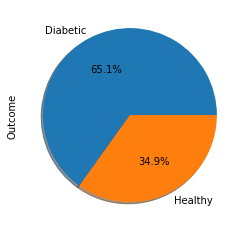

In [17]:
%matplotlib inline
# Plotting frequency of the outcome
labels = 'Diabetic', 'Healthy'
df.Outcome.value_counts().plot(kind = 'pie', labels = labels, shadow = True, autopct = '%1.1f%%')
plt.show()

From Outcome plot, we can easily observe that around 65.1% people are diabetic and 34.9% are healthy.

# Analysis by Histogram

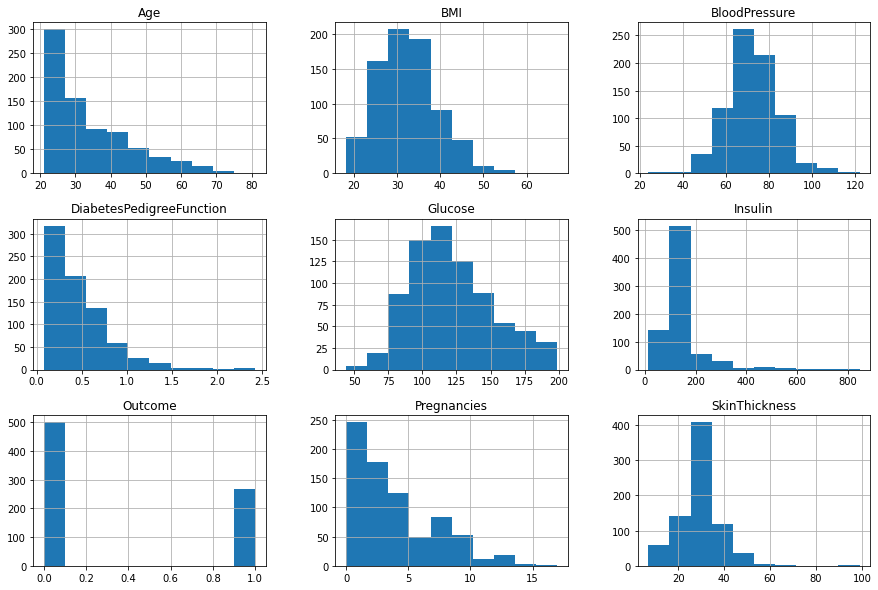

In [18]:
# Histogram

df.hist(figsize = (15, 10))
plt.show()

From the histogram analysis, we can observe that:

1. Age, DiabetesPedegreeFunction and Preganancies are rightly skewed.
2. Glucose is normally distributed.
3. The skew data has to be converted to normal distribution for ML model, since in skew data, the tail region is treated as outliers and it may affect the model after removal. Tranformation like log transformation can be used.

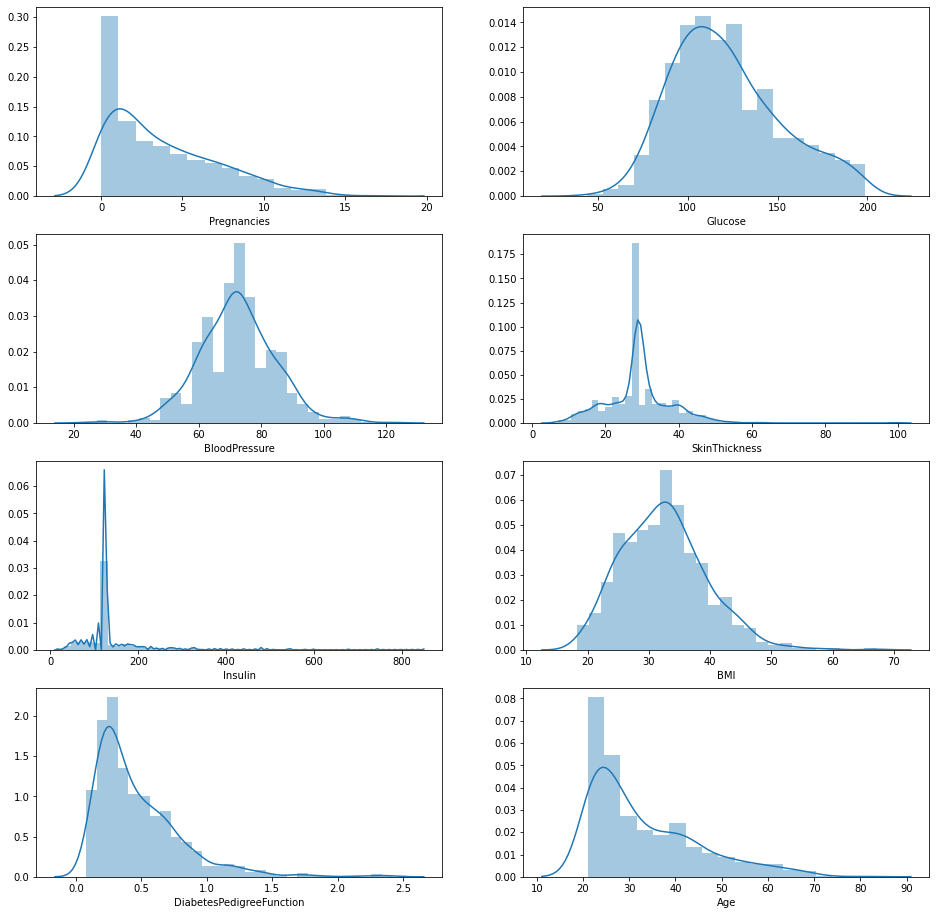

In [19]:
# Distplot

fig1, ax1 = plt.subplots(4, 2, figsize = (16, 16))

sns.distplot(df['Pregnancies'], ax = ax1[0][0])
sns.distplot(df['Glucose'], ax = ax1[0][1])
sns.distplot(df['BloodPressure'], ax = ax1[1][0])
sns.distplot(df['SkinThickness'], ax = ax1[1][1])
sns.distplot(df['Insulin'], ax = ax1[2][0])
sns.distplot(df['BMI'], ax = ax1[2][1])
sns.distplot(df['DiabetesPedigreeFunction'], ax = ax1[3][0])
sns.distplot(df['Age'], ax = ax1[3][1])

plt.show()

From the above distribution, we can observe that the variables Glucose, BloodPressure, BMI are normally distributes while Pregnancies, Age, Insulin and DiabetesPedigreeFunction are rightly skewed.

# Outcome analysis by Age

In [20]:
print(df['Age'].max(), df['Age'].min())

81 21


In [21]:
age_24 = len(df[(df['Age']<=24) & (df['Outcome'] == 1)])
age_25_30 = len(df[(df['Age'].between(25, 30)) & (df['Outcome'] == 1)]) 
age_31_40 = len(df[(df['Age'].between(31, 40)) & (df['Outcome'] == 1)])
age_41_50 = len(df[(df['Age'].between(41, 50)) & (df['Outcome'] == 1)])
age_51 = len(df[(df['Age']>=51) & (df['Outcome'] == 1)])

In [22]:
df_age = {'Age' : ['<=24', '25-30', '31-40', '41-50', '>=51'], 'Outcome' : [age_24, age_25_30, age_31_40, age_41_50, age_51]}
df_age = pd.DataFrame(df_age, columns = ['Age', 'Outcome'])

In [23]:
df_age['Percentage Diabetic'] = df_age['Outcome'] / df['Outcome'].sum()*100

In [24]:
df_age

,Age,Outcome,Percentage Diabetic
0,<=24,31,11.567164
1,25-30,59,22.014925
2,31-40,76,28.358209
3,41-50,64,23.880597
4,>=51,38,14.179104


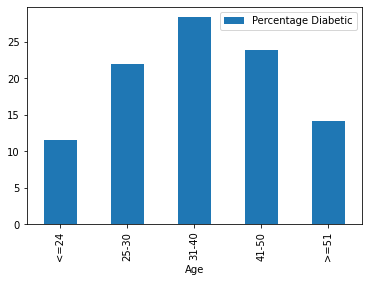

In [47]:
df_age.plot.bar('Age', 'Percentage Diabetic')
plt.show()

From the age analysis we can observe following things:

1. The total no of diabetic patients ar 34.8% out of total outcome count. So, the above analysis is done for this 34.8%.
2. The age analysis predicts that there are about 28% of Patients with Diabetic in the age range of 31-40, while ages below 24 and above 38 takes least percentage with 11.5% and 14.17%


# Analysis with Pregnancies

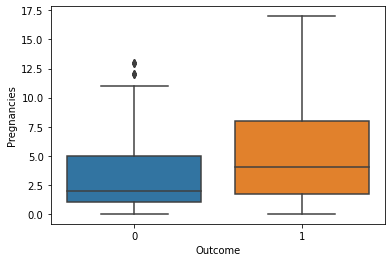

In [25]:
sns.boxplot(df['Outcome'], df['Pregnancies'])
plt.show()

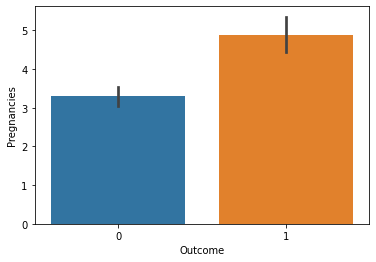

In [26]:
sns.barplot(df['Outcome'], df['Pregnancies'])
plt.show()

From both BoxPlot and BarPlot, we can observe that patient with Pregnancies have higher chances of getting Diabetic

# Analysis of Glucose variable

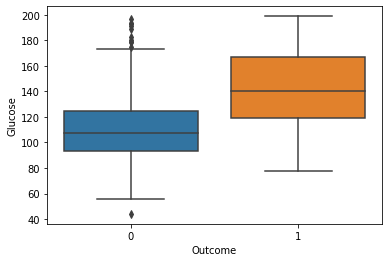

In [27]:
sns.boxplot(df['Outcome'], df['Glucose'])
plt.show()

1. Here, the Glucose variable with 0 outcome has some outliers 
present.
2. The Glucose variable with 1 outcome is perfectly distributed without outliers.


# Analysis of BP variable

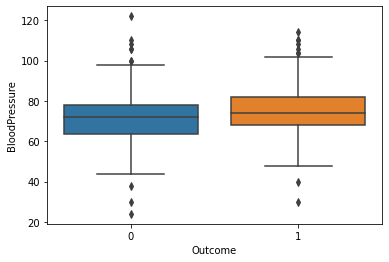

In [28]:
sns.boxplot(df['Outcome'], df['BloodPressure'])
plt.show()

There are a lot of outliers in BloodPressure for both outcomes.

# Analysis of Insulin Parameter

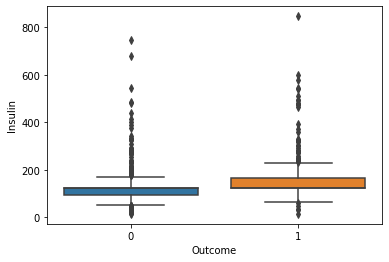

In [29]:
sns.boxplot(df['Outcome'], df['Insulin'])
plt.show()

Insulin parameter also has lot and lot of outlier values.

# Analysis of BMI

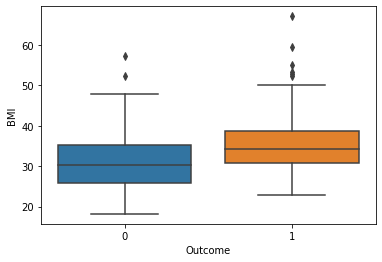

In [30]:
sns.boxplot(df['Outcome'], df['BMI'])
plt.show()

# Analysis of Diabetes Pedigree Function Parameter

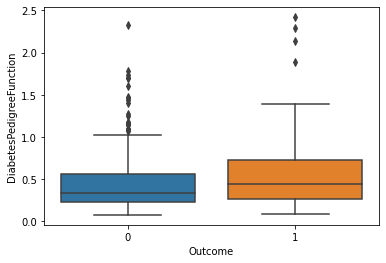

In [31]:
sns.boxplot(df['Outcome'], df['DiabetesPedigreeFunction'])
plt.show()

# Co-relation matrix

In [32]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


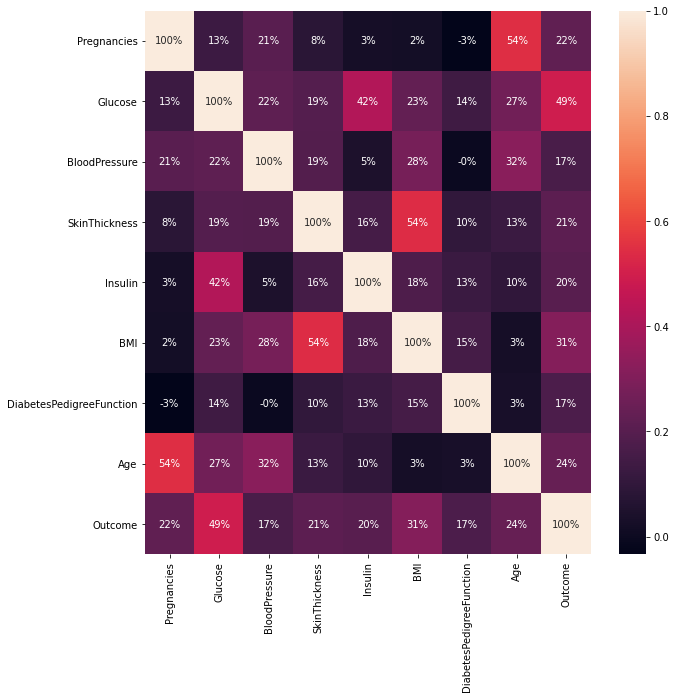

In [33]:
# Co-relation matrix
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')
plt.show()

The correlation matrix gives the relation between the variables.

1. There is a 54% correlation between SkinThickness and BMI which implies that as SkinThinkness increases, BMI increases by 54% and vice-versa.
2. In the dataset there is very less negative correlation between the varaibles.

# Conclusion

1. The dataset is a classification problem to find out whether the person is diabetic or not based on various parameters/varaibles.

2. The dataset is checked with data types, null values and description.

3. The null values are treated with median in the dataset.

4. The percentage of diabetic people are calculated based on age range.

5. Outliers for each variables are analysed. Skewness is analysed for each variable.

6. Correlation matrix analysis is done.